Name: Gustavo Silva Rios

Date: 11/07/2023

This is my first end-to-end data science project for my portfolio. 
It involved the challenge of working with two datasets, highlights the importance of Preprocessing techniques, the search for patterns and trends with Exploratory Data Analysis and the use of a ML model to segment the target audiences for accurate decision-making using the data.

I used two fictional datasets from the Google Data Analytics course for this. The course asked me to do some cleaning on them with Google Sheets but as a form of study i decided to do it with Python as well, new ideas about doing new things with the dataset kept surging and i tried my best to analyze all the possibilities i have noticed.

As my expertise in data analysis grows, I aim to be able to delve deeper into the analysis and be able uncover more insights. This project serves as a reflection of my progress and showcases the application of the acquired knowledge until this moment.

Thank you!

# Problems to be solved:  

<font size="3"><b>1. Merge, clean and standardization of two user datasets (fictional data):</b></font>

* Users are identified with their emails in one dataset and unique MemberID numbers on the another. To leverage the email information, we need to extract and move the email addresses to a separate column;
* Look for duplicate entrys on both datasets;
* Standardize the MemberID columns by assigning numeric values to all users. Users previously identified by their emails will be assigned new numeric Member IDs.

<font size="3"><b>2. Draw inferences about the merged dataset.</b></font>
 
<font size="3"><b>3. Fitting a K-means model to cluster the most valued users on the dataset.</b></font>


<font size="4"><b>Importing libs for data manipulation and analysis</b></font>

In [1]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

<font size="4"><b>Reading .csv datasets and setting options to visualize all columns and rows of the datasets if needed</b></font>

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
df_global = pd.read_csv('Global_Logistics Association_Data_to_Merge_GLA_Members.csv')
df_inter = pd.read_csv('International_Logistics_Association_Memberships_Data_to_Merge_Association_ABC_memberships.csv')  

<font size="4"><b>Overview of the datasets</b></font>
* Checking Variables and Variable Types
* Checking for null and duplicate values

In [3]:
print(df_global.info())
df_global.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Member ID            81 non-null     object
 1   Last name            81 non-null     object
 2   First name           81 non-null     object
 3   Street               81 non-null     object
 4   Apt/Ste/Unit         13 non-null     object
 5   New Address          81 non-null     object
 6   City                 81 non-null     object
 7   State                62 non-null     object
 8   Country              81 non-null     object
 9   Zip Code             65 non-null     object
 10  Dues amount          81 non-null     object
 11  Membership end date  81 non-null     object
 12  Member type          81 non-null     object
dtypes: object(13)
memory usage: 8.4+ KB
None


,Member ID,Last name,First name,Street,Apt/Ste/Unit,New Address,City,State,Country,Zip Code,Dues amount,Membership end date,Member type
0,sakaguchiabbas@email.com,Sakaguchi,Abbas,25 Dyas Rd,Ste. 101,25 Dyas RdSte. 101,North York,ON,Canada,M3B 1V7,$99,"Sunday, March 27, 2022",Young Professional


In [4]:
print(df_inter.info())
df_inter.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Member ID                 71 non-null     int64 
 1   Last name                 71 non-null     object
 2   First name                71 non-null     object
 3   Address 1                 71 non-null     object
 4   Address 2                 71 non-null     object
 5   Address 3                 30 non-null     object
 6   Address 4                 71 non-null     object
 7   Address 5                 39 non-null     object
 8   Dues amount               71 non-null     object
 9   Membership valid through  71 non-null     object
 10  Member type               71 non-null     object
dtypes: int64(1), object(10)
memory usage: 6.2+ KB
None


,Member ID,Last name,First name,Address 1,Address 2,Address 3,Address 4,Address 5,Dues amount,Membership valid through,Member type
0,100011,Tsao,Danny,27 Wu Tzu St,Tamshui 251,NaN,Taiwan,NaN,$200,3/25/2021,Professional Member


<font size="4"><b>Checking for null and duplicate elements on both datasets: </b></font>

In [5]:
# Number of duplicate values in df_global
print(f'Duplicate Value Count: {df_global.duplicated().sum()}')

Duplicate Value Count: 0


In [6]:
# Number of null values in df_global
df_global.isnull().sum()

Member ID               0
Last name               0
First name              0
Street                  0
Apt/Ste/Unit           68
New Address             0
City                    0
State                  19
Country                 0
Zip Code               16
Dues amount             0
Membership end date     0
Member type             0
dtype: int64

In [7]:
# Number of duplicate values in df_inter
print(f'Duplicate Value Count: {df_inter.duplicated().sum()}')

Duplicate Value Count: 1


In [8]:
# Number of null values in df_inter
df_inter.isnull().sum()

Member ID                    0
Last name                    0
First name                   0
Address 1                    0
Address 2                    0
Address 3                   41
Address 4                    0
Address 5                   32
Dues amount                  0
Membership valid through     0
Member type                  0
dtype: int64

<font size="4"><b>Standardizing the column names of 'df_inter' to match those of 'df_global'.</b></font>

In [9]:
df_inter = df_inter.rename(columns={'Address 3': 'State', 'Address 4': 'Country',
                                    'Address 5': 'Zip Code', 'Membership valid through': 'Membership end date' })

In [10]:
# Visualizing the df_inter changes 
df_inter.head(3)

,Member ID,Last name,First name,Address 1,Address 2,State,Country,Zip Code,Dues amount,Membership end date,Member type
0,100011,Tsao,Danny,27 Wu Tzu St,Tamshui 251,NaN,Taiwan,NaN,$200,3/25/2021,Professional Member
1,100012,Lei,Colleen,88 6th Avenue Teda,300457 TIANJIN,NaN,China,NaN,$500,10/12/2023,Corporate Member
2,100013,Roth,Nancy,Hoefenstrasse 31,Muehlethal,NaN,Switzerland,4812,$100,1/11/2023,Student Associate


<font size="4"><b>Concatenating columns to unify addresses</b></font>

Concatenating the values from the 'Apt/Ste/Unit' column with the 'Street' column and changing the name of the 'Street', 'New address' columns to 'Address 1' and 'Address 2'

In [11]:
# .fillna('') - all null values replaced with a empty string
df_global['Street'] = df_global['Street'] + df_global['Apt/Ste/Unit'].fillna('')

# Deleting the column 'Apt/Ste/Unit', axis=1 means the columns axis)
df_global = df_global.drop('Apt/Ste/Unit', axis=1)
df_global = df_global.rename(columns={'Street': 'Address 1', 'New Address': 'Address 2'})

In [12]:
# Visualizing the df_global changes 
df_global.head(3)

,Member ID,Last name,First name,Address 1,Address 2,City,State,Country,Zip Code,Dues amount,Membership end date,Member type
0,sakaguchiabbas@email.com,Sakaguchi,Abbas,25 Dyas RdSte. 101,25 Dyas RdSte. 101,North York,ON,Canada,M3B 1V7,$99,"Sunday, March 27, 2022",Young Professional
1,dorionrichard@email.com,Dorion,Richard,7101 Notre Dame St,7101 Notre Dame St,Montreal,QC,Canada,H1N 2G4,"$2,499",2/29/2022,Lifetime Member
2,gougeonsanjay@email.com,Gougeon,Sanjay,8580 Esplanade Ave,8580 Esplanade Ave,Montreal,QC,Canada,H2P 2R8,$199,"Tuesday, November 9, 2021",Professional Member


<font size="4"><b>Merging</b></font>

In order to merge the two datasets, we need to standardize the column names on both datasets.
After doing that it's possible to concatenate them vertically.
I also removed the duplicates on the Columns 'Member ID', 'Last name', 'First name' to avoid inaccurate analysis.

In [13]:
# Concatenate the DataFrames vertically
merged_df = pd.concat([df_global, df_inter])

# Remove duplicates based on the identification columns.
merged_df.drop_duplicates(subset=['Member ID', 'Last name', 'First name'], inplace=True)
merged_df.reset_index(drop=True, inplace=True)

# View the beginning of the new merged dataframe
merged_df.head(3)

,Member ID,Last name,First name,Address 1,Address 2,City,State,Country,Zip Code,Dues amount,Membership end date,Member type
0,sakaguchiabbas@email.com,Sakaguchi,Abbas,25 Dyas RdSte. 101,25 Dyas RdSte. 101,North York,ON,Canada,M3B 1V7,$99,"Sunday, March 27, 2022",Young Professional
1,dorionrichard@email.com,Dorion,Richard,7101 Notre Dame St,7101 Notre Dame St,Montreal,QC,Canada,H1N 2G4,"$2,499",2/29/2022,Lifetime Member
2,gougeonsanjay@email.com,Gougeon,Sanjay,8580 Esplanade Ave,8580 Esplanade Ave,Montreal,QC,Canada,H2P 2R8,$199,"Tuesday, November 9, 2021",Professional Member


In [14]:
# View the end of the new merged dataframe
merged_df.tail(3)

,Member ID,Last name,First name,Address 1,Address 2,City,State,Country,Zip Code,Dues amount,Membership end date,Member type
148,100080,Takeuchi,Bellande,435 Plessis Rd,Springfield,NaN,MB,Canada,R3X 1W9,$200,6/2/2021,Professional Member
149,100081,St-Germain,Poulin,600 Dr Frederick Philips,Saint-Laurent,NaN,QC,Canada,H4M 2S9,"$1,000",2/17/2021,Corporate Voting
150,100082,Thakur,De Larbre,SF-9 Sri Sai Paradise,Bangalore KRN -560061,NaN,NaN,India,NaN,$200,10/23/2021,Professional Member


To prioritize users with numeric Member IDs and ensure consistency, this code filters the dataset starting from row 81 with the Member ID "100011". It then reorganizes the rows, moving these users to the beginning. Additionally, the row index is reset to achieve standardization across the dataset.

In [15]:
# Filter the rows starting from row 81 with the Member ID "100011"
lines = merged_df[merged_df['Member ID'] == 100011].index[0]

# Reorganize the rows
merged_df = pd.concat([merged_df.loc[lines:], merged_df.loc[:lines-1]])
merged_df.reset_index(drop=True, inplace=True)

In [16]:
merged_df.head(2)

,Member ID,Last name,First name,Address 1,Address 2,City,State,Country,Zip Code,Dues amount,Membership end date,Member type
0,100011,Tsao,Danny,27 Wu Tzu St,Tamshui 251,NaN,NaN,Taiwan,NaN,$200,3/25/2021,Professional Member
1,100012,Lei,Colleen,88 6th Avenue Teda,300457 TIANJIN,NaN,NaN,China,NaN,$500,10/12/2023,Corporate Member


<font size="4"><b>Finding emails, moving to a separate column and indexing all users with unique member IDs</b></font>

With Regular Expressions it is possible to search for emails by looking for the emails pattern:

(r'^[\w.-]+@[\w.-]+\.\w+$')


^ indicates the start of the string.

[\w\.-]+ matches one or more alphanumeric characters, underscores (\w), dots (.), or hyphens (-) before the "@" symbol.
"@" matches the "@" character.

[\w\.-]+ matches one or more alphanumeric characters, underscores (\w), dots (.), or hyphens (-) after the "@" symbol.
\. matches the "." character.

\w+ matches one or more alphanumeric characters after the dot, representing the email domain extension.

$ indicates the end of the string.

In [17]:
count = 100011
# Create a new column 'Emails'
merged_df['Emails'] = ''

# Set the regex pattern to identify emails
email_pattern = r'^[\w\.-]+@[\w\.-]+\.\w+$'

# Iterate over each row of the dataframe
for index, row in merged_df.iterrows():
    # Check if the value in the "Member ID" column matches the email pattern
    if re.match(email_pattern, str(row['Member ID'])):
        # If it is an email, copy the value to the "Emails" column
        merged_df.at[index, 'Emails'] = row['Member ID']
    merged_df.at[index, 'Member ID'] = count
    count += 1

In [18]:
# View samples of the merged_df with all Member ID's standardized
merged_df.sample(4)

,Member ID,Last name,First name,Address 1,Address 2,City,State,Country,Zip Code,Dues amount,Membership end date,Member type,Emails
19,100030,Lee,Chie Shin,P O Box 112-066,Auckland,NaN,NaN,New Zealand,1061,$100,6/28/2021,Student Associate,
143,100154,Cook,Marie,202-5288 Melbourne St,202-5288 Melbourne St,Vancouver,BC,Canada,V5R 6E6,$199,"Saturday, April 30, 2022",Professional Member,cookmarie@email.com
79,100090,Kither,Luc,13 Alleyne Ave,13 Alleyne Ave,ARMADALE,VIC,Australia,3143,$149,"Wednesday, November 30, 2022",Academic Professional,kitherluc@email.com
4,100015,Nunez,Helmut,Andador Pinos 345,45235 Zapopan,NaN,JAL,Mexico,NaN,$200,7/29/2023,Professional Member,


<font size="4"><b>Dealing with different date formats</b></font>

The 'Membership end date' column contains two varying date formats. To address this issue and ensure consistency, a conversion process was applied using the datetime library. By transforming all dates into a standardized format of 'mm/dd/yyyy', the dataset now allows for accurate time-based analyses and comparisons.

In [19]:
def convert_date(date_str):
    # Verify if it is a NA/NaN (null) value
    if pd.isnull(date_str):  
        return pd.NaT
    # Verify the date if it is already on the format 'mm/dd/yyyy'
    if re.match(r'\d{1,2}/\d{1,2}/\d{4}', date_str): 
        return date_str
    # Try to convert the date into the 'mm/dd/yyyy' format.
    try:
        date = datetime.strptime(date_str, '%A, %B %d, %Y')
        return date.strftime('%m/%d/%Y')
    except ValueError:
        # exception to try to to convert the date into other known formats.
        try:
            date = datetime.strptime(date_str, '%A, %B %d, %Y')
            return date.strftime('%m/%d/%Y')
        except ValueError:
            # Returns NaT for invalid dates or in other date formats
            return pd.NaT  
        
# Apply the function convert_date to the column "Membership end date".
merged_df['Membership end date'] = merged_df['Membership end date'].apply(convert_date)

In [20]:
# View samples Dataframe with dates standardized
merged_df.sample(2)

,Member ID,Last name,First name,Address 1,Address 2,City,State,Country,Zip Code,Dues amount,Membership end date,Member type,Emails
19,100030,Lee,Chie Shin,P O Box 112-066,Auckland,NaN,NaN,New Zealand,1061,$100,6/28/2021,Student Associate,
73,100084,Wright,Mohamed,135 Dundas St,135 Dundas St,Cambridge,ON,Canada,N1R 5X1,$999,05/31/2022,Sponsor,wrightmohamed@email.com


<font size="4"><b>Data Visualizations</b></font>

In order to make some visualizations, it is necessary to format certain numerical columns appropriately.

In [21]:
# Remove the "$" symbol from the 'Dues amount' column and convert it to numeric
merged_df['Dues amount'] = merged_df['Dues amount'].astype(str).replace({'\$': '', ',': ''}, regex=True).astype(float)

<font size="3"><b>Barchart showing the Countries with the highest total dues amount</b></font>

<class 'pandas.core.frame.DataFrame'>
               Country  Dues amount Percentage
4               Canada      29439.0      66.1%
8              Germany       2497.0       5.6%
14         Netherlands       1994.0       4.5%
13              Mexico       1500.0       3.4%
19           Singapore       1498.0       3.4%
5                China       1349.0       3.0%
21               Spain        998.0       2.2%
10               India        800.0       1.8%
23         Switzerland        600.0       1.3%
26      United Kingdom        600.0       1.3%
24              Taiwan        349.0       0.8%
7               France        300.0       0.7%
9            Hong Kong        200.0       0.4%
12            Malaysia        200.0       0.4%
1              Belgium        200.0       0.4%
25            Thailand        200.0       0.4%
17         Philippines        200.0       0.4%
11  Korea, Republic of        200.0       0.4%
22              Sweden        200.0       0.4%
20        South Africa

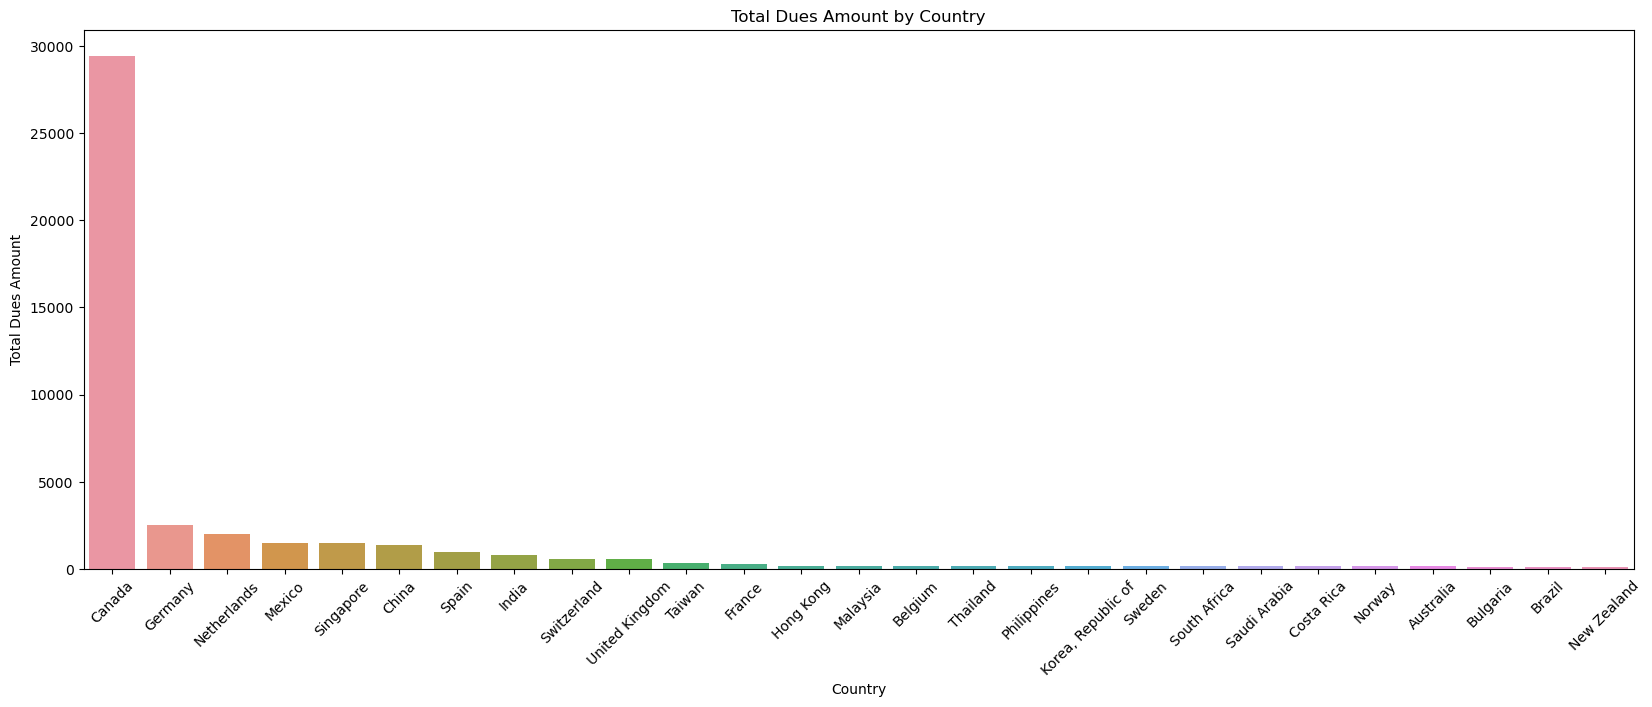

In [22]:
# Group the data by country and calculate the sum of 'Dues Amount'
country_dues = merged_df.groupby('Country')['Dues amount'].sum().reset_index()
print(type(country_dues))

# Total of dues across all countries
total_dues = country_dues['Dues amount'].sum()

# New column 'Percentage' to store the percentages 
country_dues['Percentage'] = (country_dues['Dues amount'] / total_dues) * 100
country_dues['Percentage'] = country_dues['Percentage'].round(1).astype(str) + '%'

# Sort the values in descending order
country_dues = country_dues.sort_values(by='Dues amount', ascending=False)

# Showing 'Dues Amount' sum for each Country and the Percentages
print(country_dues)

# Create the visualization using Seaborn
plt.figure(figsize=(20, 7))
sns.barplot(x=country_dues['Country'], y=country_dues['Dues amount'])
plt.xlabel('Country')
plt.ylabel('Total Dues Amount')
plt.title('Total Dues Amount by Country')
plt.xticks(rotation=45)
plt.show()

<font size="3"><b>Barchart Conclusions</b></font>

Based on the output of the total dues amount by country, we can draw the following conclusions:

* Canada has the highest total dues amount, with a sum of \$29,439. This indicates that Canada contributes the most to the overall dues revenue (66.1%);

* Germany has the second highest total dues amount, with a sum of \$2,497;

* The Netherlands follows with a total dues amount of \$1,994;

* Other countries, such as Mexico, Singapore, China, Spain, India, Switzerland, and the United Kingdom, also contribute to the overall dues revenue, although their amounts are relatively lower compared to Canada;

* These findings suggest that Canada plays a significant role in generating dues revenue, while other countries contribute to a lesser extent. Further analysis could explore the distribution of dues amounts within each country and identify any potential patterns or factors influencing the variations in dues contributions among different countries.

<font size="3"><b> .describe() function shows the 5 number summary :</b></font>

* Mean/Median/1st and 3rd quartiles, standard deviation, minimum/maximum due value.

In [23]:
# Filter missing values in column 'Dues amount'
df_filtered = merged_df.dropna(subset=['Dues amount'])
df_filtered.describe()

,Dues amount
count,151.000000
mean,295.158940
std,414.922822
min,99.000000
25%,149.000000
50%,199.000000
75%,200.000000
max,2499.000000


<font size="3"><b> .describe() Conclusions: </b></font>
Based on the descriptive analysis of the 'Dues amount' values in the filtered dataframe, we can draw some conclusions.

The number of valid observations for 'Dues amount' is 151. The mean of the dues payments is approximately 295.16, with a standard deviation of 414.92. This indicates considerable variability in the payment amounts among the members.

The minimum value found is 99, while the maximum value is 2499. This suggests a wide range in the dues payments made by the members.

Looking at the quartiles, we can see that 25% of the values are below 149, while 50% are below 199. The median value (50th percentile) is 199, indicating that half of the members paid an amount less than this, and half paid an amount higher.

The third quartile (75th percentile) is 200, suggesting that the majority of members pay an amount equal to or close to this. However, it is worth noting that there is a considerable difference between the third quartile and the maximum value, indicating the presence of potential outliers or members with significantly higher payments compared to the majority.

In summary, the 'Dues amount' values in the dataframe show a wide variation in the dues payments made by the members, with a relatively high mean. It is important to further investigate members with very high values to understand the factors contributing to these significantly higher payments.

<font size="3"><b>Boxplot and Histogram of dues Amount:</b></font>

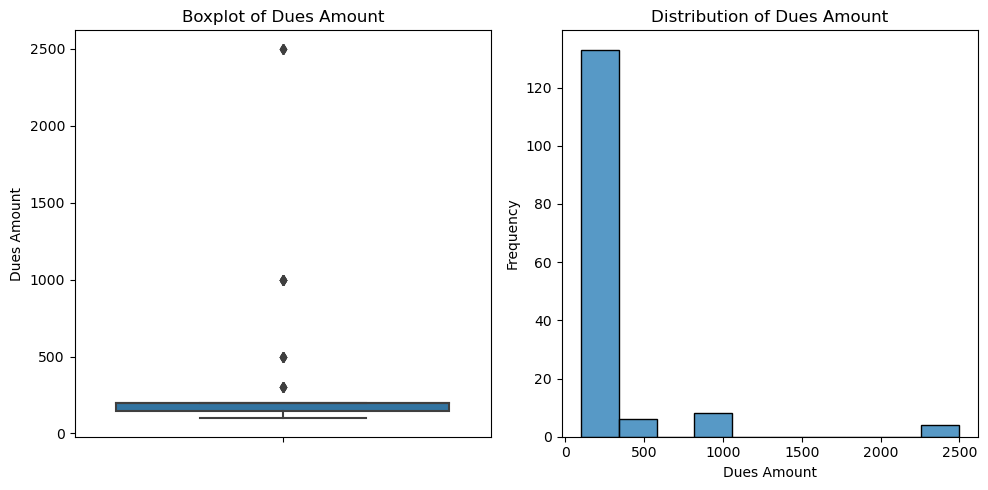

In [24]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the boxplot on the first subplot
sns.boxplot(data=df_filtered, y='Dues amount', ax=axes[0])
axes[0].set_title('Boxplot of Dues Amount')
axes[0].set_ylabel('Dues Amount')

# Plot the histogram on the second subplot
sns.histplot(data=merged_df, x='Dues amount', bins=10, ax=axes[1])
axes[1].set_xlabel('Dues Amount')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Dues Amount')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

<font size="3"><b>Boxplot Conclusions:</b></font>

* The boxplot provides valuable insights into the distribution of the 'Dues amount' in the dataset;

* The median value, represented by the line inside the box, is relatively low, indicating that the majority of members tend to pay around 100 to 250 dollars in dues. This suggests that the most common payment range is within this interval;

* The box itself, which represents the interquartile range (IQR), is considerably narrow, indicating a tight distribution of values within the middle 50% of the data. This further supports the observation that the majority of members pay dues within a similar range;

* The whiskers, which extend from the box, show the range of most of the data. In this case, the whiskers are relatively short, suggesting that the majority of dues payments fall within a limited range;

* However, the presence of several outliers, depicted as individual points beyond the whiskers (also shown on the histogram), indicates the existence of members who pay significantly higher amounts in dues. These outliers include values as high as 2500 dollars and others ranging from 400 to 1000 dollars. These outliers can potentially skew the mean and should be further investigated to understand the reasons behind these higher payments;

* In conclusion, the boxplot analysis reveals that while the majority of members pay dues within a relatively low to moderate range, there are notable outliers with significantly higher payment amounts. Further exploration and investigation of these outliers can provide valuable insights into the factors influencing the dues payments in this dataset;

<font size="3"><b>Histogram Conclusions:</b></font>

 * Majority of Dues: The histogram shows a large bar indicating that the majority of dues amounts fall within the range of 100 dollars to 300 dollars. This suggests that a significant number of members pay dues within this range, making it the most common payment category;
 
 * Few High Dues: There is a small bar to the right of the main bar representing dues amounts greater than \$500. This indicates that there are relatively fewer members who pay higher dues amounts. These members might belong to a different membership category or have specific privileges or benefits associated with their higher dues;

 * Outlier Dues: The histogram also reveals a single isolated bar at the extreme right end, representing dues of \$2500. This indicates the presence of an outlier or a few outliers with significantly higher dues amounts. These outliers might be associated with unique circumstances or special membership arrangements;

 * In conclusion, the histogram analysis of dues amounts suggests that the majority of members pay dues in the range of 100 dollars to 300 dollars, while a smaller portion pays higher amounts. The presence of outliers with significantly higher dues indicates the existence of exceptional cases or distinct membership categories. Further investigation into the reasons behind these higher dues and outliers can provide insights into the membership structure and financial dynamics of the organization.

<font size="3"><b>Barchart showing the number of users from each country</b></font>

                    Count Percentage
Canada                 84      55.6%
Netherlands            12       7.9%
Mexico                  6       4.0%
Singapore               5       3.3%
Switzerland             4       2.6%
India                   4       2.6%
Spain                   4       2.6%
Germany                 4       2.6%
China                   4       2.6%
France                  3       2.0%
United Kingdom          3       2.0%
Taiwan                  2       1.3%
Belgium                 2       1.3%
South Africa            1       0.7%
Australia               1       0.7%
Saudi Arabia            1       0.7%
Costa Rica              1       0.7%
Brazil                  1       0.7%
Sweden                  1       0.7%
Korea, Republic of      1       0.7%
Bulgaria                1       0.7%
Hong Kong               1       0.7%
Thailand                1       0.7%
Philippines             1       0.7%
Malaysia                1       0.7%
New Zealand             1       0.7%
N

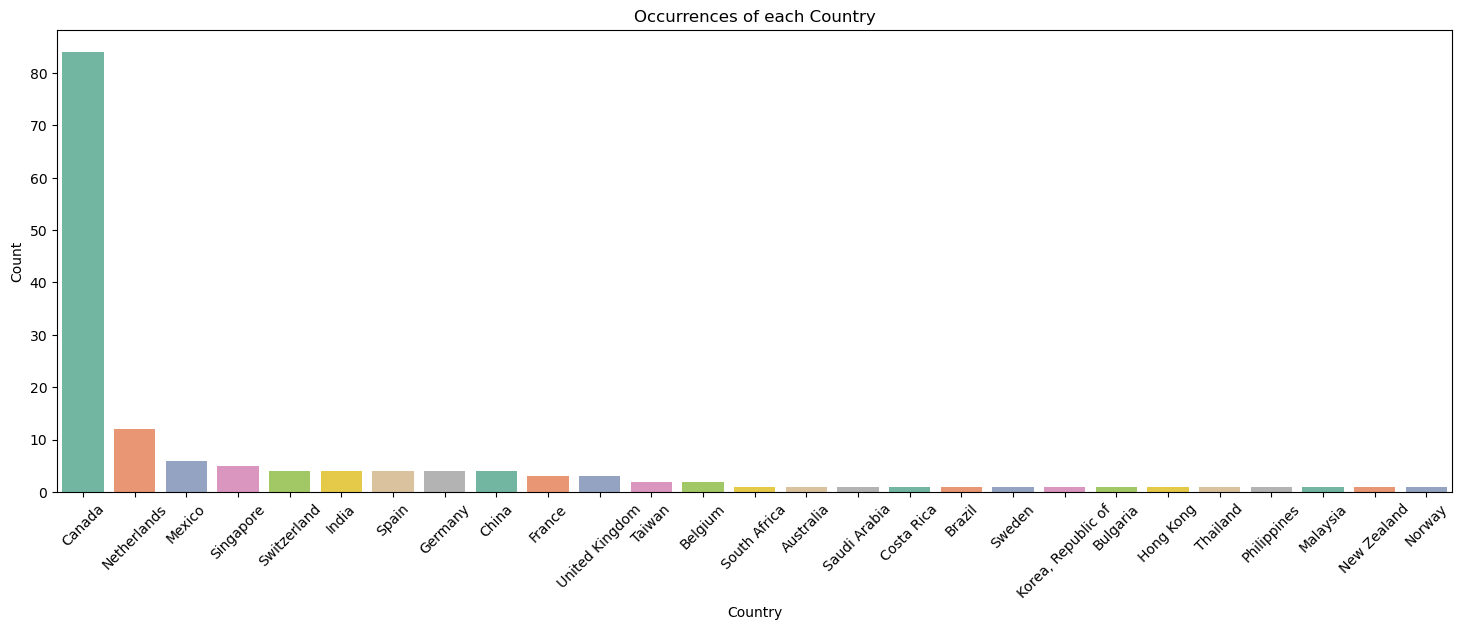

In [25]:
import matplotlib.pyplot as plt

# Count of occurrences for each country
country_counts = merged_df['Country'].value_counts()
#print(country_counts)

# Calculate the percentages
country_percentages = (country_counts / country_counts.sum()) * 100

# Format the percentages to one decimal place
country_percentages = country_percentages.round(1).astype(str) + '%'

# Create a new DataFrame with country counts and percentages
country_data = pd.DataFrame({'Count': country_counts.values, 'Percentage': country_percentages})

# Displaying the new dataframe with Counts and Percentages for comparisons
print(country_data)

# Barplot for the count of occurrences
plt.figure(figsize=(18, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='Set2')
plt.title('Occurrences of each Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

<font size="3"><b>Barplot Conclusions</b></font>

Based on the output of the value counts for the 'Country' column, we can draw the following conclusions:

* Canada has the highest number of occurrences, with 84 entries in the dataset, representing 55.6% of the total users;

* The Netherlands has the second highest number of occurrences, with 12 entries, representing only 7.9% of the total users; 

* There are several countries with a moderate number of occurrences, including Mexico, Singapore, Switzerland, India, Spain, Germany, and China;

* Some countries appear less frequently, such as France, United Kingdom, Taiwan, Belgium, South Africa, Australia, Saudi Arabia, Costa Rica, Brazil, Sweden, Korea (Republic of), Bulgaria, Hong Kong, Thailand, Philippines, Malaysia, New Zealand, and Norway;

* These findings indicate that the dataset is skewed towards Canada, followed by a mix of other countries with varying representation;

* It may be interesting to further explore the distribution of other variables based on country or consider adjusting the dataset for a more balanced representation if necessary.

<font size="3"><b>Get the total number of members by member type:</b></font>

                       Count Percentage
Member type                            
Professional Member       87      57.6%
Student Associate         19      12.6%
Young Professional        12       7.9%
Academic Professional      9       6.0%
Chapter                    6       4.0%
Corporate Member           6       4.0%
Corporate Voting           5       3.3%
Lifetime Member            4       2.6%
Sponsor                    3       2.0%


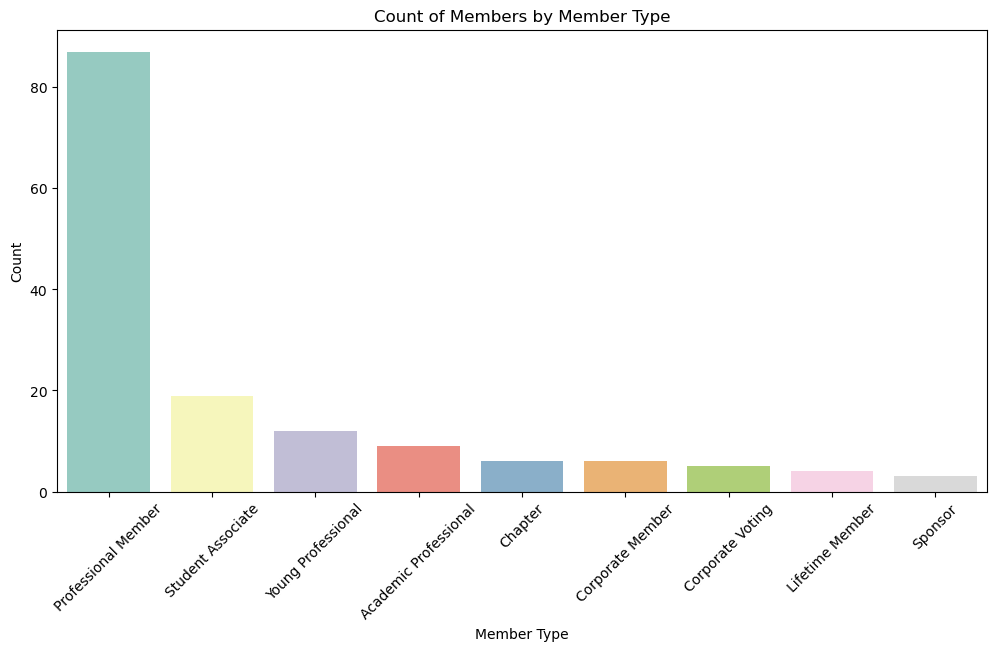

In [26]:
# Fixing a typo in 'Member type' column
merged_df['Member type'] = merged_df['Member type'].replace('{rofessional Member', 'Professional Member')

# .groupby('column')['column'].count()
# Grouping the members by their 'Member type' column and counting the number of occurrences for each type
count_by_member_type = merged_df.groupby('Member type')['Member ID'].count()
count_by_member_type = count_by_member_type.sort_values(ascending=False)

# Calculate the total count of members
total_members = count_by_member_type.sum()

# Calculate the percentages
member_type_percentages = (count_by_member_type / total_members) * 100

# Format the percentages to one decimal place
member_type_percentages = member_type_percentages.round(1).astype(str) + '%'

# Create a new DataFrame with member type counts and percentages
member_type_data = pd.DataFrame({'Count': count_by_member_type.values, 'Percentage': member_type_percentages})

# Displaying the new dataframe with Count and Percentages for comparisons
print(member_type_data)

# Creating the barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=count_by_member_type.index, y=count_by_member_type.values, palette='Set3')
plt.xlabel('Member Type')
plt.ylabel('Count')
plt.title('Count of Members by Member Type')
plt.xticks(rotation=45)

plt.show()

<font size="3"><b>Barplot Conclusions</b></font>

Based on the output of the code, here are some conclusions that can be drawn:

* Professional Member: The most common member type in the dataset is "Professional Member" with a count of 87. This indicates a significant presence of professionals in the membership.

* Student Associate: The second most common member type is "Student Associate" with a count of 19. This suggests the presence of students or individuals in the early stages of their careers.

* Young Professional: "Young Professional" is the third most common member type with a count of 12. This indicates a subgroup of members who are in the early stages of their professional careers.

* Academic Professional: There are 9 members classified as "Academic Professional," suggesting a presence of individuals involved in academic or research fields.

* Chapter, Corporate Member, Corporate Voting, Lifetime Member, and Sponsor: These member types have relatively lower counts compared to the previously mentioned types. It may be worth exploring these categories further to understand their specific characteristics and roles within the organization.

* These conclusions provide insights into the distribution of members across different types and can help in understanding the composition and diversity within the membership. Further analysis can be performed on each member type to uncover additional patterns or trends that may be relevant to the organization's objectives.

<font size="3"><b>Finding the individuals with the highest dues amount by country</b></font>

In [27]:
max_dues_by_country = merged_df.groupby('Country')['Dues amount'].max()
max_dues_by_country = max_dues_by_country.sort_values(ascending=False)
max_dues_by_country

Country
Canada                2499.0
Germany               1000.0
Mexico                 500.0
China                  500.0
Spain                  500.0
Singapore              500.0
Netherlands            299.0
Thailand               200.0
Taiwan                 200.0
Switzerland            200.0
Sweden                 200.0
Philippines            200.0
United Kingdom         200.0
Malaysia               200.0
Korea, Republic of     200.0
India                  200.0
Hong Kong              200.0
Norway                 199.0
Saudi Arabia           199.0
South Africa           199.0
Costa Rica             199.0
Australia              149.0
Belgium                100.0
New Zealand            100.0
France                 100.0
Bulgaria               100.0
Brazil                 100.0
Name: Dues amount, dtype: float64

<font size="3"><b>Conclusions</b></font>

The output from the code provides insights into the maximum dues amount paid by members in each country. Here are some observations:

* Canada has a user with the highest maximum dues amount, with a value of 2499.0;

* Germany, Mexico, China, Spain, Singapore, also have users with relatively high maximum dues amounts;

* The range of maximum dues amounts varies across different countries, indicating variations in membership fees or member contributions;

* Understanding the variations in maximum dues amounts can help identify countries where members have a higher willingness or capacity to contribute financially;

* The findings can be used to analyze the engagement of members in different countries, as higher dues amounts may reflect a stronger commitment to the organization or higher membership benefits.

<font size="3"><b>Extra Visualization: Canada is leading all the lists so i decided to check for what places in Canada we have more users</b></font>

In [28]:
# Filter only data from Canada
canada_df = merged_df[merged_df['Country'] == 'Canada'].copy()

# Combining address columns
canada_df['Address'] = canada_df['Address 1'].fillna('') + ' ' + canada_df['Address 2'].fillna('')

# Separate the house number and the street/avenue name
canada_df[['House Number', 'Street']] = canada_df['Address'].str.extract(r'^(\d+)\s+(.*)$')

# Calculate the address counts
address_counts = canada_df['Street'].value_counts().sort_values(ascending=False)

# Print the five most-common addresses
print(type(address_counts))
print(address_counts.head())

<class 'pandas.core.series.Series'>
Dundas St 135 Dundas St               2
Plessis Rd Springfield                1
Elgin St Brantford                    1
Steeles Ave West Apt. 1111 Toronto    1
Cedar Way Maple Ridge                 1
Name: Street, dtype: int64


# Imports for the K-means ML Model.
* KMeans is known to have a memory leak issue on Windows with the MKL (Math Kernel Library) library when there are fewer divisions (chunks) than available threads.
* To avoid this problem, the environment variable OMP_NUM_THREADS will be set to 1 before running the code.

In [29]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

<font size="3"><b>Before applying the algorithm, the following step is required: </b></font>
* Normalize Dues amount variable to ensure they are at the same scale as other features utilizing StandardScaler

In [30]:
merged_df.head(1)

,Member ID,Last name,First name,Address 1,Address 2,City,State,Country,Zip Code,Dues amount,Membership end date,Member type,Emails
0,100011,Tsao,Danny,27 Wu Tzu St,Tamshui 251,NaN,NaN,Taiwan,NaN,200.0,3/25/2021,Professional Member,


In [31]:
# Select only the variable 'Dues amount.'
X = merged_df[['Dues amount']]

# Normalize the 'Dues amount' column.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<font size="4"><b>APPLYING K-MEANS ALGORITHM: </b></font>

In [32]:
# Setting the desired number of clusters.
num_clusters = 3

# Execute the K-means algorithm.
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

<font size="3"><b>After fitting the model, we have the cluster labels assigned to each data instance. </b></font>
* Add a new column 'Cluster Labels' to merged_df to see which clusters each member belongs to.
* Accessing these labels through the .labels_ attribute of the kmeans object.

In [33]:
# Get cluster labels. - rotulos 
labels = kmeans.labels_

# Add the labels to the merged_df['Cluster Labels'] new column:
merged_df['Cluster Labels'] = labels

<font size="4"><b>Visualizing the results:</b></font>

* Now that we have the cluster labels assigned, we can visualize the results.
* Let's use a scatter plot to plot the points with different colors for each cluster.

In [34]:
merged_df.sample()

,Member ID,Last name,First name,Address 1,Address 2,City,State,Country,Zip Code,Dues amount,Membership end date,Member type,Emails,Cluster Labels
141,100152,Paquin,Howard,500 Palladium Dr,500 Palladium Dr,Ottawa,ON,Canada,K2V 1C2,149.0,06/12/2022,Academic Professional,paquinhoward@email.com,1


Label 2: 139 Observations
Label 1: 8 Observations
Label 0: 4 Observations
Total Number of plotted observations: 151


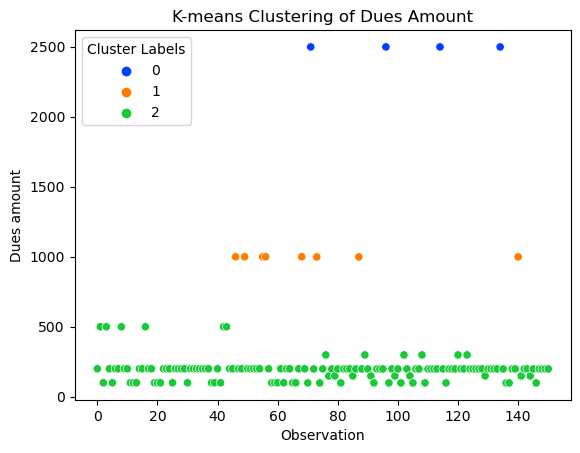

In [35]:
# Changing the values of the labels for a better understanding of the results.
merged_df['Cluster Labels'] = merged_df['Cluster Labels'].map({0: 1, 1: 2, 2: 0})

# Plot the points with different colors for each cluster using Seaborn.
scatter = sns.scatterplot(data=merged_df, x=range(len(X)), y='Dues amount', hue='Cluster Labels', palette='bright')
plt.xlabel('Observation')
plt.ylabel('Dues amount')
plt.title('K-means Clustering of Dues Amount')

# Get the count of observations for each label/color
label_counts = merged_df['Cluster Labels'].value_counts()

# Print the count of observations for each label/color
for label, count in label_counts.items():
    print(f"Label {label}: {count} Observations")
    
# Obtain the total number of plotted observations.
num_points = len(scatter.collections[0].get_offsets())
print("Total Number of plotted observations:", num_points)

plt.show()

<font size="4"><b>K-means algorithm conclusions:</b></font>

* The K-means unsupervisioned clustering algorithm was applied to a dataset of 151 observations and segmented the users into three distinct clusters based on their dues amounts. For each cluster it is possible to develop targeted marketing strategies tailored to the specific needs and preferences of each user segment.

* Label 0 (green): Represents the segment with lower spending patterns compared to the other clusters but where the majority of the users are. Strategies that effectively reach a large audience can be employed in this segment.
* Label 1 (orange): Represents the median users, who spend more than the majority but less than the most valuable segment. There is not a considerable amount of users here and the amount is twice of the usually paid by the majority.
* Label 2 (blue): Comprises the most valuable users, characterized by higher spending patterns and the potential for generating significant returns in targeted marketing campaigns.